In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2

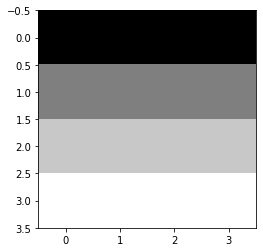

In [5]:
a=np.asarray([[0,0,0,0],
            [127,127,127,127],
            [200,200,200,200],
            [255,255,255,255]],dtype='uint8') #uint8은 1바이트, 색을 나타낼때 주로 사용.

plt.imshow(a, cmap = 'gray')

(4, 4, 3)


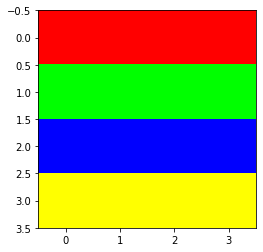

In [6]:
r=np.asarray([[255,255,255,255],
            [0,0,0,0],
            [0,0,0,0],
            [255,255,255,255]],dtype='uint8')

g=np.asarray([[0,0,0,0],
            [255,255,255,255],
            [0,0,0,0],
            [255,255,255,255]],dtype='uint8')

b=np.asarray([[0,0,0,0],
            [0,0,0,0],
            [255,255,255,255],
            [0,0,0,0]],dtype='uint8')

colors=np.dstack([r,g,b]) #세가지의 색을 조합하여 색깔 표현. 종이(면)를 겹친다 생각.
print(colors.shape)
plt.imshow(colors)

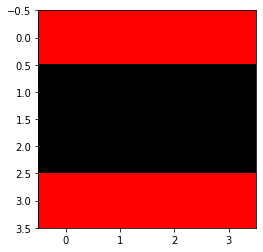

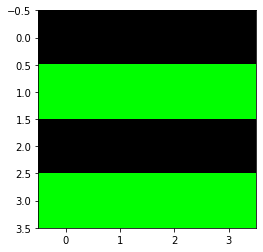

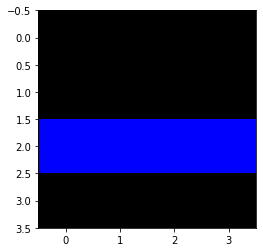

In [7]:
z=np.zeros((4,4),dtype='uint8')

rr=np.dstack([r,z,z])
gg=np.dstack([z,g,z])
bb=np.dstack([z,z,b])
#red, grean, blue 색 표현하는 법.

plt.imshow(rr)
plt.show()
plt.imshow(gg)
plt.show()
plt.imshow(bb)
plt.show()

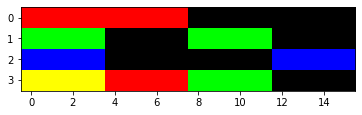

In [8]:
all1 = np.hstack([np.dstack([r,g,b]), rr,gg,bb]) #합쳐진것, 나눠놓은것
plt.imshow(all1)

<class 'numpy.ndarray'>
(797, 1200, 3)


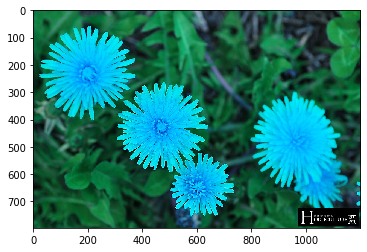

In [9]:
img=cv2.imread('./yellow.jpg')
print(type(img))
print(img.shape)

#openCV는 RGB 순서가 아니라 BGR 순서를 사용함.
plt.imshow(img)

(797, 1200)


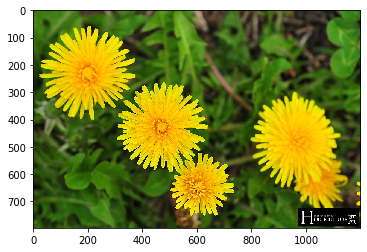

In [10]:
#img에서 0번째, 1번째, 2번째 면을 추출
b=img[:, :, 0]
print(b.shape)
g=img[:, :, 1]
r=img[:, :, 2]

#추출한 면의 순서를 rgb순서로 다시 stack
rgb=np.dstack([r,g,b])
plt.imshow(rgb)

#이런식으로도 표현
# img[:, :, 0] = r
# img[:, :, 1] = g
# img[:, :, 2] = b

(797, 1200)


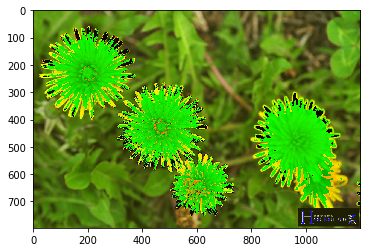

In [11]:
# 노란색 밝기 증가(시각적으론 얼마 차이 안남). 녹색부분은 overflow된 것.
b=img[:, :, 0]
print(b.shape)
g=img[:, :, 1] + 30
r=img[:, :, 2] + 30

#추출한 면의 순서를 rgb순서로 다시 stack
rgb=np.dstack([r,g,b])
plt.imshow(rgb)

True

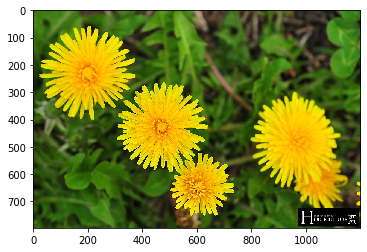

In [12]:
#convert color 함수. BGR을 RGB로 변환
rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
cv2.imwrite('result.jpg',rgb) #파일로 저장

<img src='./result.jpg' width='200'>

In [59]:
# HSV.색을 표현하는 하나의 방법이자, 
# 그 방법에 따라 색을 배치하는 방식.
# 색상(Hue), 채도(Saturation), 명도(Value)
img_suzy=cv2.imread('./suzy.jpg')
print(img_suzy.shape)
hsv = cv2.cvtColor(img_suzy, cv2.COLOR_BGR2HSV)

(189, 266, 3)


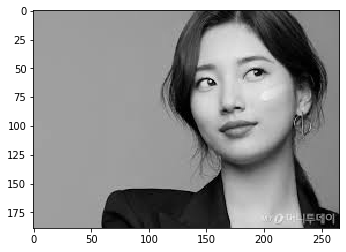

In [163]:
#흑백으로 변환하기.
result1 = img_suzy.copy()
h=hsv[:, :, 0]
s=hsv[:, :, 1]
v=hsv[:, :, 2]

for r in range(h.shape[0]) : 
    for c in range(h.shape[1]) :
        # int로 형 변환하는 이유 : 255를 초과하여 overflow되는것을 방지하기 위함.
        col = (int(img_suzy[r,c,0])+img_suzy[r,c,1]+img_suzy[r,c,2])/3
        result1[r,c,:]=col
        
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))

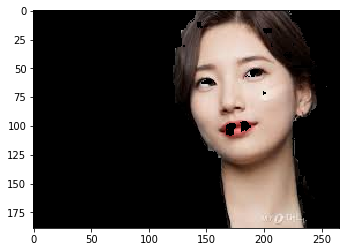

In [170]:
# 사진에서 얼굴 부분만 추출하기.
result2 = img_suzy.copy()

for r in range(h.shape[0]) : 
    for c in range(h.shape[1]) :
        # h가 0~20 사이일 경우 원본의 값 사용.
        if h[r, c] >= 0 and h[r, c] <=20 :
            #col = (int(img_suzy[r,c,0])+img_suzy[r,c,1]+img_suzy[r,c,2])/3
            result2[r,c,0]=img_suzy[r,c,0]
            result2[r,c,1]=img_suzy[r,c,1]
            result2[r,c,2]=img_suzy[r,c,2]
        # 그 이외의 값일 경우 0으로 변환. black
        else :
            result2[r,c,:]=0
        
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))

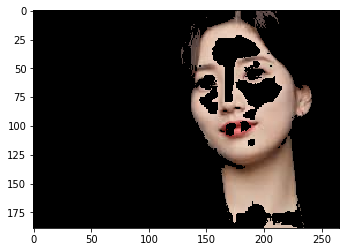

In [167]:
# lower = np.array([0, 48, 80], dtype='uint8')
# upper = np.array([20, 255, 255], dtype='uint8')
# lower~upper사이의 값만 원본 값 사용하고 나머진 0으로 변환.
result3 = img_suzy.copy()

for r in range(h.shape[0]) : 
    for c in range(h.shape[1]) :
        if h[r, c] >= 0 and h[r, c] <=20 and s[r, c] >= 48 and s[r, c] <=255 and v[r, c] >= 80 and v[r, c] <=255 :
            #col = (int(img_suzy[r,c,0])+img_suzy[r,c,1]+img_suzy[r,c,2])/3
            result3[r,c,0]=img_suzy[r,c,0]
            result3[r,c,1]=img_suzy[r,c,1]
            result3[r,c,2]=img_suzy[r,c,2]
        else :
            result3[r,c,0]=0
            result3[r,c,1]=0
            result3[r,c,2]=0
            
plt.imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))

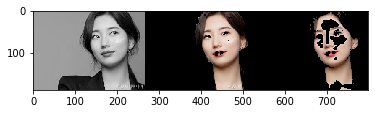

In [168]:
# 얼굴 부분만 제외하고 검은색 처리, lower upper 전체 적용한것, mask(얼굴 부분 흰색으로)
# 다시해볼것

all2 = np.hstack([result1, result2, result3])

plt.imshow(cv2.cvtColor(all2, cv2.COLOR_BGR2RGB))

(107, 146, 3)


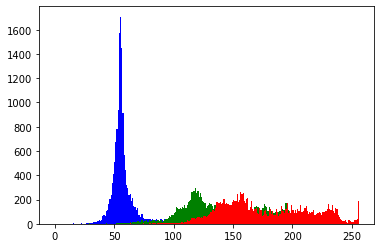

In [96]:
# 개나리 사진. 꽃 부분과 배경 부분 히스토그램으로 표현
train=cv2.imread('flower_train.png')
print(train.shape)

#채널 쪼개는 함수
b, g, r = cv2.split(train)

# (1차원 배열로 바꾸기, 개수, 범위, 색상)
plt.hist(b.ravel(), 256, [0,256], color='b')
plt.hist(g.ravel(), 256, [0,256], color='g')
plt.hist(r.ravel(), 256, [0,256], color='r')
plt.show()

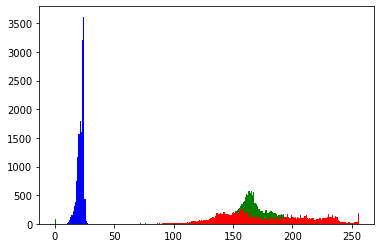

In [102]:
h, s, v = cv2.split(cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

plt.hist(h.ravel(), 256, [0,256], color='b')
plt.hist(s.ravel(), 256, [0,256], color='g')
plt.hist(v.ravel(), 256, [0,256], color='r')
plt.show()

(109, 239, 3)


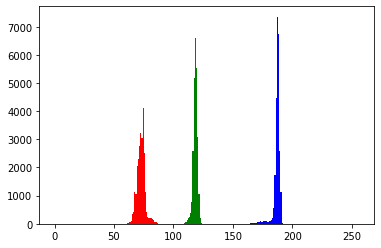

In [103]:
train1=cv2.imread('flower_back.png')
print(train1.shape)

#채널 쪼개는 함수
b, g, r = cv2.split(train1)

# (1차원 배열로 바꾸기, 개수, 범위, 색상)
plt.hist(b.ravel(), 256, [0,256], color='b')
plt.hist(g.ravel(), 256, [0,256], color='g')
plt.hist(r.ravel(), 256, [0,256], color='r')
plt.show()

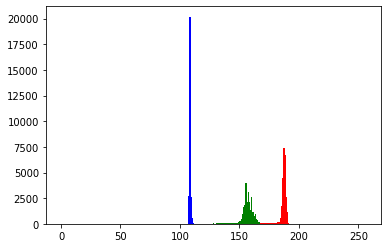

In [104]:
h, s, v = cv2.split(cv2.cvtColor(train1, cv2.COLOR_BGR2HSV))

plt.hist(h.ravel(), 256, [0,256], color='b')
plt.hist(s.ravel(), 256, [0,256], color='g')
plt.hist(v.ravel(), 256, [0,256], color='r')
plt.show()

(480, 852, 3)


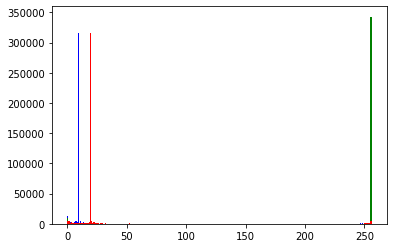

In [172]:
# 연습문제 ) 크로마키 사진 구분하기

train=cv2.imread('zebra.jpg')
print(train.shape)

h, s, v = cv2.split(train, cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

hh = plt.hist(h.ravel(), 256, [0,256], color='b')
hs = plt.hist(s.ravel(), 256, [0,256], color='g')
hv = plt.hist(v.ravel(), 256, [0,256], color='r')

9 255 19


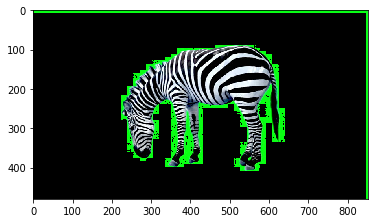

In [183]:
maxh = (np.where(hh[0]==np.max(hh[0])))[0][0]
maxs = (np.where(hs[0]==np.max(hs[0])))[0][0]
maxv = (np.where(hv[0]==np.max(hv[0])))[0][0]

print(maxh,maxs,maxv)
train.any()

for r in range(train.shape[0]) : 
    for c in range(train.shape[1]) :
        if np.array_equal(train[r,c,:], [maxh,maxs,maxv]) :
            train[r, c, :]=[0, 0, 0]    
        
plt.imshow(train)